In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [2]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [3]:
!pip install plotly

In [4]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

from sklearn.model_selection import train_test_split

In [5]:
def train_df(tr_path):
    classes, class_paths = zip(*[(label, os.path.join(tr_path, label, image))
                                 for label in os.listdir(tr_path) if os.path.isdir(os.path.join(tr_path, label))
                                 for image in os.listdir(os.path.join(tr_path, label))])

    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

In [6]:
def test_df(ts_path):
    classes, class_paths = zip(*[(label, os.path.join(ts_path, label, image))
                                 for label in os.listdir(ts_path) if os.path.isdir(os.path.join(ts_path, label))
                                 for image in os.listdir(os.path.join(ts_path, label))])

    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df

In [7]:
train_data = train_df('D:\Mahir\Datasets\Merged Dataset 1\Training')

In [8]:
train_data


,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 1\Training\gl...,glioma
1,D:\Mahir\Datasets\Merged Dataset 1\Training\gl...,glioma
2,D:\Mahir\Datasets\Merged Dataset 1\Training\gl...,glioma
3,D:\Mahir\Datasets\Merged Dataset 1\Training\gl...,glioma
4,D:\Mahir\Datasets\Merged Dataset 1\Training\gl...,glioma
...,...,...
5707,D:\Mahir\Datasets\Merged Dataset 1\Training\pi...,pituitary
5708,D:\Mahir\Datasets\Merged Dataset 1\Training\pi...,pituitary
5709,D:\Mahir\Datasets\Merged Dataset 1\Training\pi...,pituitary
5710,D:\Mahir\Datasets\Merged Dataset 1\Training\pi...,pituitary


In [9]:
test_data = test_df('D:\Mahir\Datasets\Merged Dataset 1\Testing')

In [10]:
test_data

,Class Path,Class
0,D:\Mahir\Datasets\Merged Dataset 1\Testing\gli...,glioma
1,D:\Mahir\Datasets\Merged Dataset 1\Testing\gli...,glioma
2,D:\Mahir\Datasets\Merged Dataset 1\Testing\gli...,glioma
3,D:\Mahir\Datasets\Merged Dataset 1\Testing\gli...,glioma
4,D:\Mahir\Datasets\Merged Dataset 1\Testing\gli...,glioma
...,...,...
1306,D:\Mahir\Datasets\Merged Dataset 1\Testing\pit...,pituitary
1307,D:\Mahir\Datasets\Merged Dataset 1\Testing\pit...,pituitary
1308,D:\Mahir\Datasets\Merged Dataset 1\Testing\pit...,pituitary
1309,D:\Mahir\Datasets\Merged Dataset 1\Testing\pit...,pituitary


In [11]:
train_path = 'D:\Mahir\Datasets\Merged Dataset 1\Training'
test_path = 'D:\Mahir\Datasets\Merged Dataset 1\Testing'

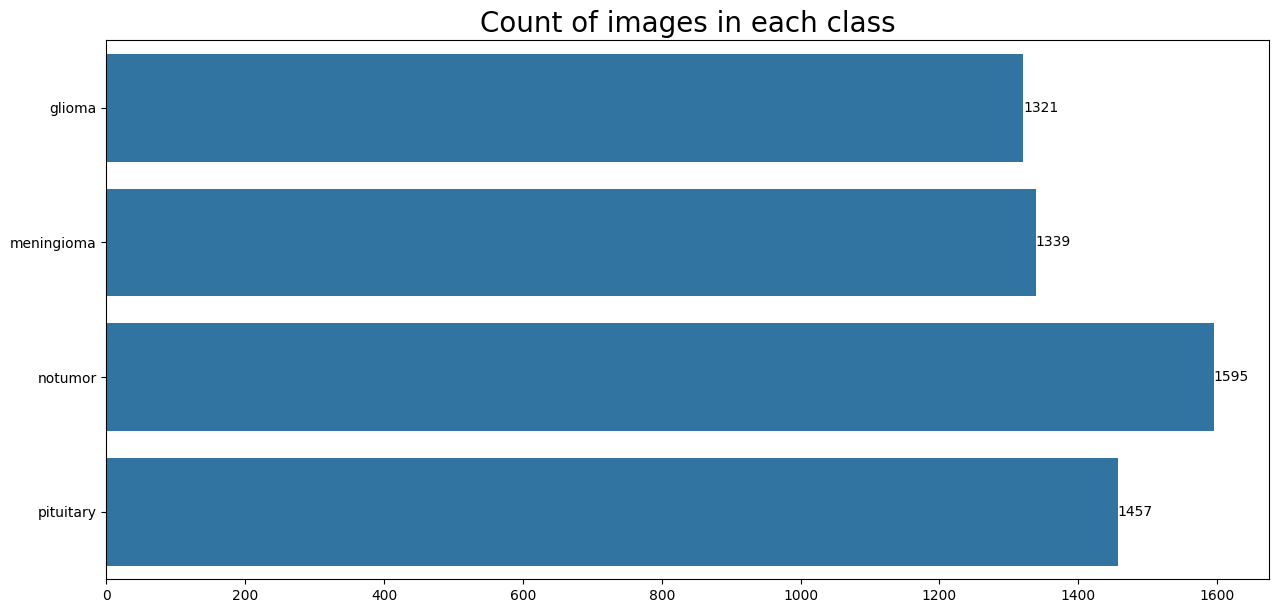

In [12]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=train_data , y=train_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

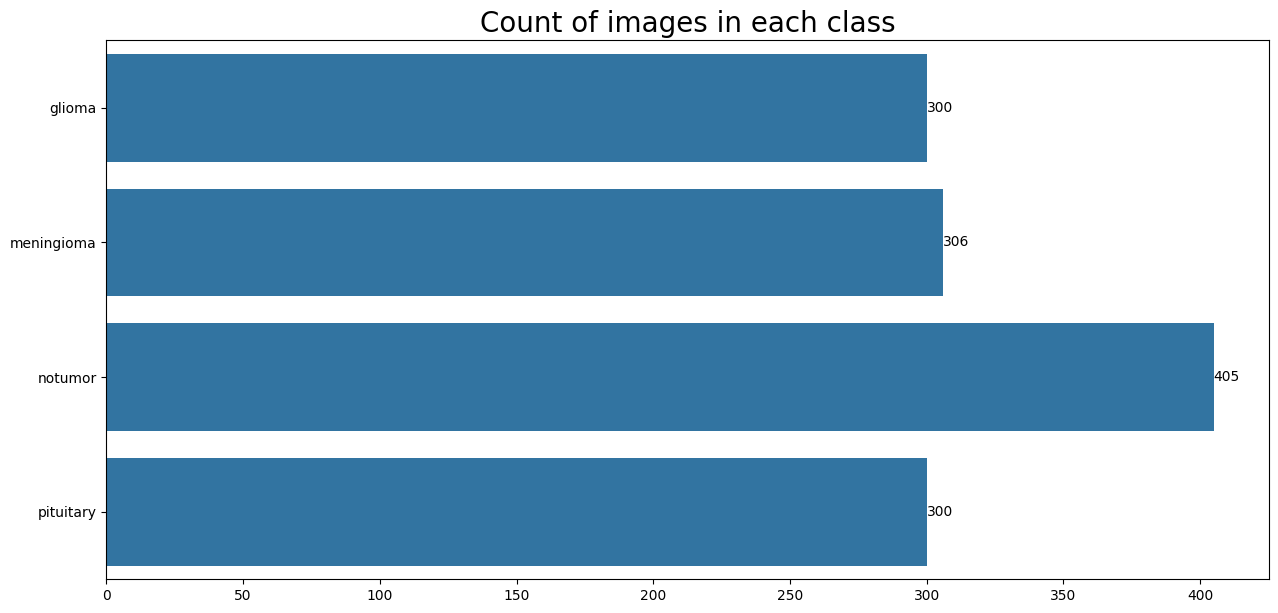

In [13]:
# Count of images in each class in train data
plt.figure(figsize=(15,7))
ax = sns.countplot(data=test_data , y=test_data ['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()


In [14]:
# Image size
image_size = (160, 160)

# Training batch size
batch_size = 32

In [15]:
!pip install opencv-python

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt


def apply_unsharp_mask(image):
    # Convert tensor to numpy array for OpenCV
    image_np = image.numpy()
    blurred = cv2.GaussianBlur(image_np, (5, 5), sigmaX=1.0)
    unsharp_image = cv2.addWeighted(image_np, 1.5, blurred, -0.5, 0)
    return unsharp_image

# Combine Sobel and Unsharp functions
def custom_preprocessing(image):
    image = tf.py_function(func=apply_unsharp_mask, inp=[image], Tout=tf.float32)
    return image

# ImageDataGenerator with custom preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=custom_preprocessing)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.5, preprocessing_function=custom_preprocessing)

# Creating training data generator
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=0
)

# Creating validation data generator
val_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=0
)

# Applying the generator to testing data, only rescaling and custom preprocessing
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(160, 160),
    batch_size=32,
    class_mode='categorical',
    subset='training',  # Uses the other 50% intended for testing
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 655 images belonging to 4 classes.
Found 656 images belonging to 4 classes.


In [17]:
# Visualization function
def show_ImageDataGenerator(data_generator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to visualize how the ImageDataGenerator augments the data
    """
    # Generate augmented samples
    images, _ = next(data_generator)
    
    # Plot the images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    for i in range(num_samples):
        axes[i].imshow(images[i])
        axes[i].axis('off')
    
    if save:
        plt.savefig('show_ImageDataGenerator.pdf')
    
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20286843..1.2745233].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.104271255..1.0838363].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.31380752..1.3144917].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17979485..1.0810466].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11941483..1.1352351].


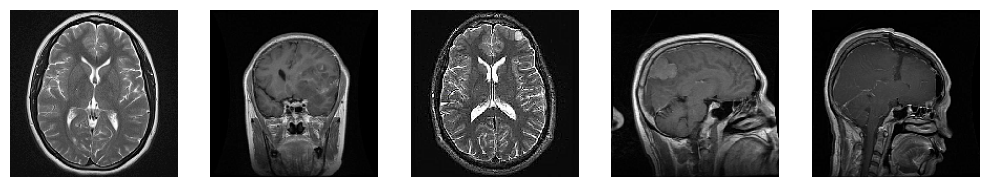

In [18]:
show_ImageDataGenerator(train_generator, num_samples=5, figsize=(12.5, 8), save=False)


In [19]:
# Image shape: height, width, RBG
image_shape = (image_size[0], image_size[1], 3)


print(f'Image shape: {image_shape}')
print(f'Batch size: {batch_size}')
print(f'Number of Train batches: {len(train_generator)}')
print(f'Number of Validation batches: {len(val_generator)}')
print(f'Number of Testing batches: {len(test_generator)}')

Image shape: (160, 160, 3)
Batch size: 32
Number of Train batches: 179
Number of Validation batches: 21
Number of Testing batches: 21


In [20]:
Classes_Map = train_generator.class_indices

num_classes = len(Classes_Map)

print("Number of Classes:", num_classes)
Classes_Map

Number of Classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [21]:
def plot_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')


  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, 'bo-' , label = "TrainL oss")
  plt.plot(epochs, val_loss, 'o-' , color='orange', label = "Val Loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()


  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, 'bo-' , label = "Train Acc")
  plt.plot(epochs, val_accuracy, 'o-' , color='orange' , label = "Val Acc")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

  plt.style.use('default')

In [22]:
def CM(model, test_generator, categories):
    """
    Function to return the confusion matrix of a given CNN model.
    """
    from sklearn.metrics import confusion_matrix
    # Predictions on test dataset
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Create a confusion matrix
    confusion_matrix_array = confusion_matrix(true_categories, predicted_categories)
    print(f"Classification Report for {model}:")
    print(classification_report(true_categories, predicted_categories, target_names=categories))

    return confusion_matrix_array


def calculate_metrics(confusion_matrix, categories):
    """
    Function to calculate important metrics for multi-classification problems.
    """
    # Calculating 4 different metrics
    precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
    recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
    f1_score = 2 * (precision * recall) / (precision + recall)
    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    # Printing the results based on each category
    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    # Showing the total accuracy of the model
    print(f"\nAccuracy: {accuracy:.3f}")

# Resnet student MODEL

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import LearningRateScheduler

def residual_block(x, filters, stride=1, dropout_rate=0.3):
    shortcut = x

    # First convolutional layer with L2 regularization and dropout
    x = layers.Conv2D(filters, kernel_size=3, strides=stride, padding="same", use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Dropout(dropout_rate)(x)

    # Second convolutional layer with L2 regularization
    x = layers.Conv2D(filters, kernel_size=3, strides=1, padding="same", use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(x)
    x = layers.BatchNormalization()(x)

    # Adjust the shortcut path
    if stride != 1 or x.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size=1, strides=stride, use_bias=False,
                                 kernel_regularizer=regularizers.l2(0.001))(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Combine and activate
    x = layers.add([x, shortcut])
    x = layers.ReLU()(x)
    return x

def build_resnet_student(input_shape=(160, 160, 3), num_classes=4, dropout_rate=0.3):
    inputs = layers.Input(shape=input_shape)

    # Initial convolution layer with L2 regularization
    x = layers.Conv2D(16, kernel_size=3, strides=1, padding="same", use_bias=False,
                      kernel_regularizer=regularizers.l2(0.001))(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Residual blocks with L2 regularization and dropout
    x = residual_block(x, 16, stride=1, dropout_rate=dropout_rate)  # 1 block
    x = residual_block(x, 32, stride=2, dropout_rate=dropout_rate)  # Downsample + 1 block
    x = residual_block(x, 64, stride=2, dropout_rate=dropout_rate)  # Downsample + 1 block

    # Final layers
    x = layers.GlobalAveragePooling2D()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    # Build model
    model = models.Model(inputs, outputs)
    return model

# Instantiate the model
model = build_resnet_student(num_classes=4)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 160, 160, 16  432         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 160, 160, 16  64         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [24]:

# Learning Rate Scheduler
def lr_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        # Convert the result of tf.math.exp(-0.1) to a float
        return float(lr * tf.math.exp(-0.1))


# Compile the model with Adam optimizer and learning rate scheduler
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if labels are not one-hot encoded
    metrics=['accuracy']
)

# Train the model with the Learning Rate Scheduler and EarlyStopping
callbacks = [
    LearningRateScheduler(lr_scheduler),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
]

# Assuming train_generator and val_generator are defined
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/50
179/179 [==============================] - 65s 327ms/step - loss: 0.9905 - accuracy: 0.7048 - val_loss: 2.1297 - val_accuracy: 0.2336 - lr: 0.0010
Epoch 2/50
179/179 [==============================] - 34s 191ms/step - loss: 0.7571 - accuracy: 0.7817 - val_loss: 2.0866 - val_accuracy: 0.2809 - lr: 0.0010
Epoch 3/50
179/179 [==============================] - 35s 195ms/step - loss: 0.6716 - accuracy: 0.8121 - val_loss: 1.5089 - val_accuracy: 0.5740 - lr: 0.0010
Epoch 4/50
179/179 [==============================] - 39s 219ms/step - loss: 0.6054 - accuracy: 0.8244 - val_loss: 2.1790 - val_accuracy: 0.4412 - lr: 0.0010
Epoch 5/50
179/179 [==============================] - 41s 229ms/step - loss: 0.5694 - accuracy: 0.8337 - val_loss: 2.4575 - val_accuracy: 0.4656 - lr: 0.0010
Epoch 6/50
179/179 [==============================] - 43s 238ms/step - loss: 0.5300 - accuracy: 0.8433 - val_loss: 1.5080 - val_accuracy: 0.5344 - lr: 0.0010
Epoch 7/50
179/179 [==============================] 

In [25]:
!pip install pickle5

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [15 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickle.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-310\pickle5
  copying pickle5\__init__.py -> build\lib.win-amd64-cpython-310\pickle5
  creating build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-310\pickle5\test
  copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-310\pickle5\test
  running build_ext
  building 'pickle5._pickle' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with 

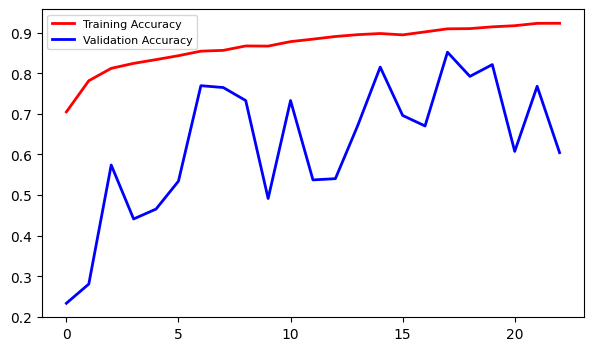

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(7,4))

# Set the linewidth to a smaller value (e.g., 2)
plt.plot(epochs, acc, 'r', label="Training Accuracy", linewidth=2)
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy", linewidth=2)

# Adjust the legend font size
plt.legend(loc='upper left', fontsize=8)  # Set fontsize to your preference

plt.show()


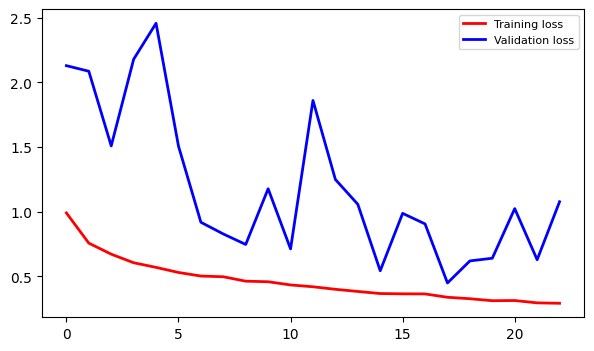

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

fig = plt.figure(figsize=(7,4))

# Set the linewidth to a smaller value (e.g., 2)
plt.plot(epochs, loss, 'r', label="Training loss", linewidth=2)
plt.plot(epochs, val_loss, 'b', label="Validation loss", linewidth=2)

# Adjust the legend font size
plt.legend(loc='upper right', fontsize=8)  # Set fontsize to your preference

plt.show()


In [28]:
train_score = model.evaluate(train_generator, verbose=1)
valid_score = model.evaluate(val_generator, verbose=1)
test_score = model.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")


21/21 [==============================] - 16s 758ms/step - loss: 0.4860 - accuracy: 0.8140
Train Loss: 0.3613
Train Accuracy: 88.88%
--------------------
Validation Loss: 0.4489
Validation Accuracy: 85.19%
--------------------
Test Loss: 0.4860
Test Accuracy: 81.40%


In [29]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

21/21 [==============================] - 13s 619ms/step


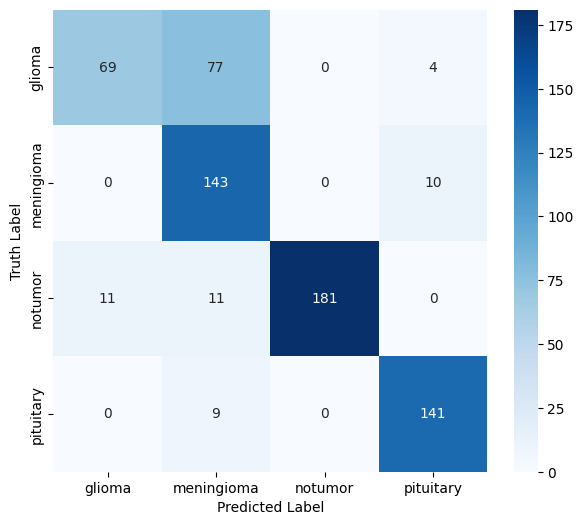

In [32]:

cm = confusion_matrix(test_generator.classes, y_pred)
class_dict = train_generator.class_indices
labels = list(class_dict.keys())
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('Truth Label')
plt.show()

In [33]:
clr = classification_report(test_generator.classes, y_pred)
print(clr)

              precision    recall  f1-score   support

           0       0.86      0.46      0.60       150
           1       0.60      0.93      0.73       153
           2       1.00      0.89      0.94       203
           3       0.91      0.94      0.92       150

    accuracy                           0.81       656
   macro avg       0.84      0.81      0.80       656
weighted avg       0.85      0.81      0.81       656



## Custom CNN

In [34]:
# Building a Lighter Version of the Lightweight Model
def build_lighter_model():
    model = Sequential()

    # Block 1 - Lighter
    model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(160, 160, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))  # Less dropout to keep model small

    # Block 2 - Lighter
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    # Block 3 - Lighter
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Flattening and Dense Layers
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation='softmax'))

    return model

# Initialize the model
lighter_model = build_lighter_model()
lighter_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 16)       0         
 )                                                               
                                                                 
 batch_normalization_9 (Batc  (None, 79, 79, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 79, 79, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 32)       0

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

lighter_model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])
# give a message if its early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [37]:
# give a message if its early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
hist = lighter_model.fit(train_generator,
                 epochs=50,
                 validation_data=val_generator,
                 callbacks=[early_stopping],
                 shuffle= False)

Epoch 1/50
179/179 [==============================] - 123s 682ms/step - loss: 1.0244 - accuracy: 0.5888 - val_loss: 6.0182 - val_accuracy: 0.2290
Epoch 2/50
179/179 [==============================] - 128s 716ms/step - loss: 0.8097 - accuracy: 0.6700 - val_loss: 6.6380 - val_accuracy: 0.3145
Epoch 3/50
179/179 [==============================] - 132s 737ms/step - loss: 0.6625 - accuracy: 0.7293 - val_loss: 2.6731 - val_accuracy: 0.3985
Epoch 4/50
179/179 [==============================] - 139s 778ms/step - loss: 0.5818 - accuracy: 0.7486 - val_loss: 1.1074 - val_accuracy: 0.6153
Epoch 5/50
179/179 [==============================] - 152s 849ms/step - loss: 0.5456 - accuracy: 0.7742 - val_loss: 0.4840 - val_accuracy: 0.7756
Epoch 6/50
179/179 [==============================] - 164s 916ms/step - loss: 0.5014 - accuracy: 0.7876 - val_loss: 0.4661 - val_accuracy: 0.7740
Epoch 7/50
179/179 [==============================] - 176s 985ms/step - loss: 0.4599 - accuracy: 0.8043 - val_loss: 0.5040 -

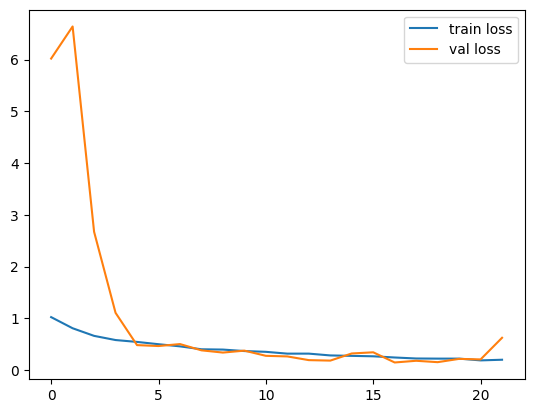

In [40]:
# plot train and val_loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

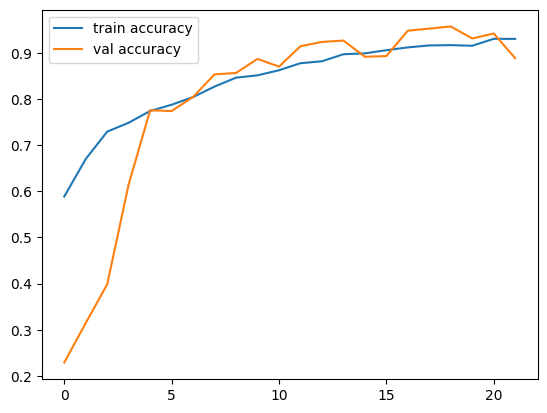

In [41]:
# plot the train and val accuracy
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [42]:
train_score = lighter_model.evaluate(train_generator, verbose=1)
valid_score = lighter_model.evaluate(val_generator, verbose=1)
test_score = lighter_model.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

21/21 [==============================] - 39s 2s/step - loss: 0.2312 - accuracy: 0.9116
Train Loss: 0.0949
Train Accuracy: 97.29%
--------------------
Validation Loss: 0.1486
Validation Accuracy: 94.81%
--------------------
Test Loss: 0.2312
Test Accuracy: 91.16%


In [46]:
# Find the text accuracy
y_pred = lighter_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

21/21 [==============================] - 35s 2s/step


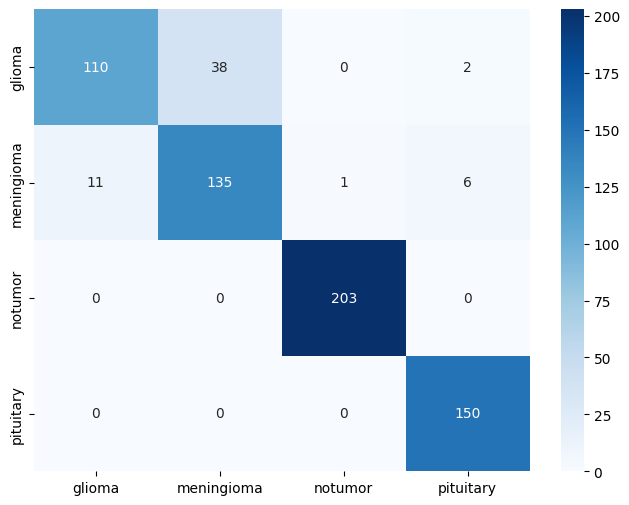

In [47]:
# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

# Assuming ts_gen.class_indices is a dictionary mapping class names to indices:
classes = list(test_generator.class_indices.keys())  # Get the class names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.show()

In [59]:
lighter_model = build_lighter_model()
lighter_model.summary()
lighter_model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 158, 158, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 79, 79, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 79, 79, 16)       64        
 chNormalization)                                                
                                                                 
 dropout_31 (Dropout)        (None, 79, 79, 16)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 77, 77, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 38, 38, 32)      

In [60]:
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import numpy as np

# Define a learning rate schedule
def lr_schedule(epoch, lr):
    # Example: Reduce learning rate by a factor of 0.1 every 10 epochs
    if epoch % 10 == 0 and epoch > 0:
        lr = lr * 0.1
    return lr

# EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# LearningRateScheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule, verbose=1)

# Fit the model with both callbacks
hist = lighter_model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[early_stopping, lr_scheduler],
    shuffle=False
)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
179/179 [==============================] - 348s 2s/step - loss: 0.9646 - accuracy: 0.6045 - val_loss: 7.2251 - val_accuracy: 0.2290 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
179/179 [==============================] - 353s 2s/step - loss: 0.7547 - accuracy: 0.6866 - val_loss: 9.9229 - val_accuracy: 0.2351 - lr: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/50
179/179 [==============================] - 353s 2s/step - loss: 0.6319 - accuracy: 0.7351 - val_loss: 2.6722 - val_accuracy: 0.4198 - lr: 0.0010

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/50
179/179 [==============================] - 354s 2s/step - loss: 0.5264 - accuracy: 0.7869 - val_loss: 2.3137 - val_accuracy: 0.5481 - lr: 0.0010

Epoch 5: LearningRateScheduler setting learning rate to

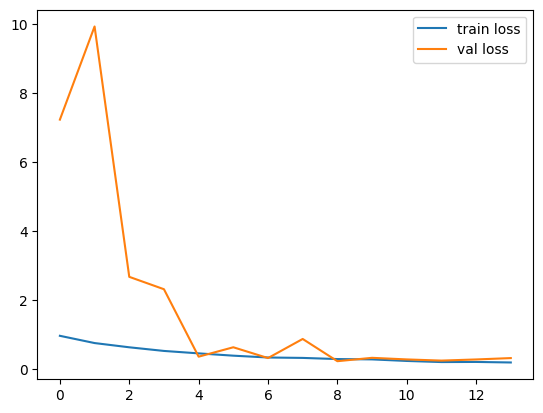

In [61]:
# plot train and val_loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.legend()
plt.show()

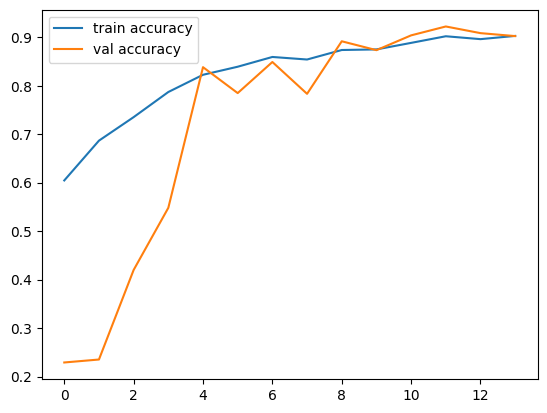

In [62]:
# plot the train and val accuracy
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

In [66]:
train_score = lighter_model.evaluate(train_generator, verbose=1)
valid_score = lighter_model.evaluate(val_generator, verbose=1)
test_score = lighter_model.evaluate(test_generator, verbose=1)

print(f"Train Loss: {train_score[0]:.4f}")
print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print('-' * 20)
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print('-' * 20)
print(f"Test Loss: {test_score[0]:.4f}")
print(f"Test Accuracy: {test_score[1]*100:.2f}%")

21/21 [==============================] - 48s 2s/step - loss: 0.2587 - accuracy: 0.8841
Train Loss: 0.1494
Train Accuracy: 95.06%
--------------------
Validation Loss: 0.2295
Validation Accuracy: 89.16%
--------------------
Test Loss: 0.2587
Test Accuracy: 88.41%


In [64]:
# Find the text accuracy
y_pred = lighter_model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

21/21 [==============================] - 48s 2s/step


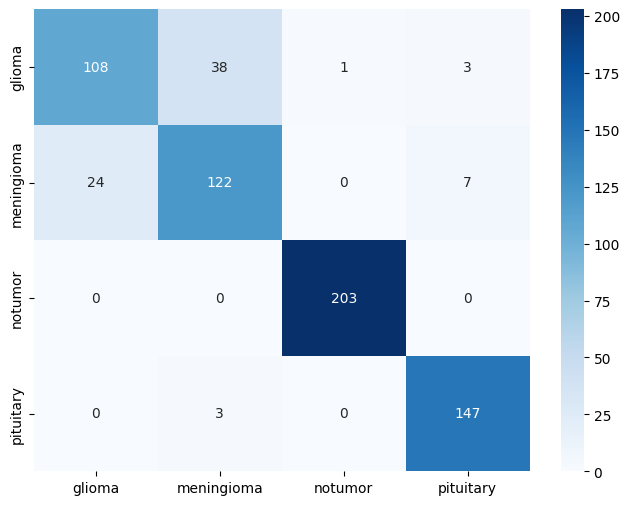

In [65]:
# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

# Assuming ts_gen.class_indices is a dictionary mapping class names to indices:
classes = list(test_generator.class_indices.keys())  # Get the class names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.show()